# Song genre classification

### ABSTRACT 

In this project we will be using the a Spotify Dataset which contains 5 different Genres which are Samba,Hip-hop, Rock , Pop , Funk, Carioca and Sertanejo.
The aim of this project is to create a classifer which can classify into the separate categories.
The data consisits of 2 separate files which are artists and lyrics.
They have a common column between them which is Alink and this is used to mergre the two data frames and we get one dataframe.



### 

In [ ]:
from spacy import displacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tqdm
import torch
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
# import transformers as ppb # pytorch transformers
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
!pip install tensorflow_text

     |████████████████████████████████| 4.9 MB 5.4 MB/s 
     |████████████████████████████████| 462 kB 37.2 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file = r'/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/lyrics-data.csv'
file2 = r'/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/artists-data.csv'
file3 = r'/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/SongClassification.py'

In [ ]:
%run '/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/SongClassification.py'


This shows that there is one GPU available for processing the data in tensorflow background.
This is a GTX1660Ti and we are going to train all the deep learning models on this library

### Aim of the Project
Since we are going to classifiy the genre we only need to have the lyrics and the genre for each of the lyrics.
So now we are going to preprocess the whole dataset into just lyrics and genre.


In [ ]:
df_artist = pd.read_csv ('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/artists-data.csv')
df_songlist  =  pd.read_csv ('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/lyrics-data.csv')
df_new = df_artist.rename(columns={'Link': 'ALink'})
## Here we are only going to take the ENGLSIH Songs.
new_df_songlist = df_songlist[df_songlist['Idiom'] == 'ENGLISH']

In [ ]:
## Merging both the dataframes based on a common link ALink
df_merge = pd.merge(new_df_songlist,df_new,on = 'ALink')
## Check for null values 
df_merge.isnull().sum()
# Removal of null values
df_merge.dropna(inplace = True) 
df_merge.isnull().sum()
df_merge.head()

## Unbalanced dataset

In [ ]:
GenreDF = df_merge.loc[:,['Genre','Lyric']]

### Make labels for all the Genres 


In [ ]:
possible_labels = GenreDF['Genre'].unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

In [ ]:
GenreDF['label'] = GenreDF['Genre'].replace(label_dict)

In [ ]:
import re
from sklearn.model_selection import train_test_split
def format_str(str_):
    str_ = re.sub('[|\[\]*.,!:?\"\'«»]', '', str_)
    str_ = re.sub('[-–——]+', ' ', str_)
    str_ = str_.strip()
    str_ = str_.lower()
    return str_

In [ ]:
y = GenreDF['Genre']
X = GenreDF['Lyric'].apply(format_str)

In [ ]:
##Test train split
# Use this as the baseline so only X_train1 and y_train1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

## Balancing the datasets

In [ ]:
Genres = GenreDF['Genre'].value_counts()
ax = sns.countplot(x="Genre", data=GenreDF).set(
    title="Unbalanced")
# fig = ax.get_figure()
# ax.figure.savefig('saveplot.png')

We see from the above given dataset tha the number of documents for Rock is much higher as compared to Pop and Hip hop.
Further the number of documents are much higher than that of Funk Carioca,Seranejo and Samba.
We are now going to choose the Number of songs in Samba and undersample the rest to balance the dataset to the limit of Samba.


In [ ]:
Undersampled = []
for i in GenreDF['Genre'].unique():
    Undersampled.append(GenreDF[GenreDF['Genre']== i].sample(Genres.min()))
Undersampleddf = pd.concat(Undersampled).sample(n=312).reset_index(drop = True)

The dataset is made ready with a balanced dataset with equal number of samples of each genre.
The dataset is undersampled in order to get equal samples as the one in the genre with minimum samples.

In [ ]:
Undersampleddf

In [ ]:
Undersampleddf
GenresUS = Undersampleddf['Genre'].value_counts()
ax = sns.countplot(x="Genre", data=Undersampleddf).set(
    title="Balanced")
# GenresUS
# ax.figure.saveplot('abc.png')

In [ ]:
X_under = Undersampleddf['Lyric'].apply(format_str)
y_under = Undersampleddf['Genre']

In [ ]:
### Test Train split unbalanced
X_trainUS, X_testUS, y_trainUS, y_testUS = train_test_split(X_under, y_under, test_size=0.30, random_state=100)

### Wordcloud depiction of each Genre

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# undersampled = {}
# for i in GenreDF['Genre'].unique():
#     undersampled[i]=GenreDF[GenreDF['Genre']== i]
# # wordcloud = {}

# for i in GenreDF['Genre'].unique():
#     a = undersampled[i].groupby('Genre')['Lyric'].apply(' '.join).reset_index()
#     wordcloud = WordCloud().generate(a['Lyric'][0])
#     plt.figure(figsize=(10,5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis("off") 
#     plt.title(label = i,fontsize=20,color='Black')
    
# plt.show()
# plt.savefig('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/WordCloud.png')

In [ ]:
# #  Categorical Data
# a = 2  # number of rows
# b = 3  # number of columns
# c = 1  # initialize plot counter

# fig = plt.figure(figsize=(40,15))
# for i in GenreDF['Genre'].unique():
#     plt.subplot(a, b, c)
#     plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
#     plt.xlabel(i)
#     cloud = Undersampled[i].groupby('Genre')['Lyric'].apply(' '.join).reset_index()
#     wordcloud = WordCloud().generate(cloud['Lyric'][0])
#     # plt.figure(figsize=(30,15))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis("off") 
#     plt.title(label = i,fontsize=20,color='Black')
#     # sns.countplot(df[i])
#     c = c + 1
# plt.show()
# # for i in heart_CAT:
# #     plt.subplot(a, b, c)
# #     plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
# #     plt.xlabel(i)
# #     sns.countplot(df[i])
# #     c = c + 1

# plt.show()
# plt.savefig('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/WordCloud.png')

### Stopwords

If we are running Tf-idf vectorizer then addition of stop words would not be a big problem as tf-idf take s the inverse rate in whcih all the frequently occuring words are given a lower score as comparted to the words that occur less frequently.
Hence for each genre we will have words that are speific inclined to that genre.


### Tokenization using spacy

The next step is to tokenize using spacy's inbuilt tokenizer.
We would need to add the above stop words to spacy's tokenizer as well.

In [ ]:
####Import the spacy small library

nlp = spacy.load("en_core_web_sm")
# nlp.Defaults.stop_words |= {'love','know','oh'}


In [ ]:
##Check all the stop words in spacy
# all_stopwords = nlp.Defaults.stop_words

In [ ]:
##This is to sentencise each of the document
# sbd = nlp.create_pipe()
# nlp.add_pipe('sentencizer')
# doc = nlp(text)
# sents_list = []
# for sent in doc.sents:
#     sents_list.append(sent.text)
# print(sents_list)

In [ ]:
# Function to preprocess the data (Remove stop words,Lemmatize adn check for alphabhets only in given documents)
def preprocess2(text):
    doc = nlp(text)
    return[words.lemma_.lower() for words in doc if words.is_alpha] 
# return[words.lemma_.lower() for words in doc if words.is_alpha and not words.is_stop] 

## Tf-Idf vectorization

The reason we choose Tf-idf vectorization is because we have a lot of repeated words which do not contribute to the classification of the genre so Tf-idf takes the inverse log giving more weight to the words which are less frequently used and less weightage to the words that are frequently used.


In [ ]:
%%time
##Tf-idf Vectoriser
vectorizer = TfidfVectorizer(tokenizer=preprocess2,stop_words='english',use_idf=True, 
                             smooth_idf=True)


In [ ]:
%%time
# X_train_text = vectorizer.fit_transform(X_train)
# X_test_text = vectorizer.transform(X_test)

In [ ]:
%%time
X_train_textUS = vectorizer.fit_transform(X_trainUS)
X_test_textUS = vectorizer.transform(X_testUS)

In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [ ]:

%%time
##Tf-idf Vectoriser
# vectorizer2 = Word2Vec(sentences=X_train)

In [ ]:
# vectorizer2.most_similar['rock']

### Dimensionality reduction using LSA

Topic models are built around the idea that the semantics of our document are actually being governed by some hidden, or topics that shape the meaning of our document and corpus. <br>LSA along with SVD can help with topic modelling on a text corpus.

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import normalize

In [ ]:
#SVD for dimensionality reduction
svd_model = TruncatedSVD(n_components=100,algorithm='randomized',n_iter=10)

In [ ]:
SVD_transformer = Pipeline([('tfidf', vectorizer), 
                            ('svd', svd_model)])
# SVD_matrix = SVD_transformer.fit_transform(X_train)

In [ ]:
%%time 
## Transforming test 
# SVD_matrix_test = SVD_transformer.transform(X_test)

In [ ]:
%%time 
SVD_matrixUS = SVD_transformer.fit_transform(X_trainUS)
## Transforming test 
SVD_matrix_testUS = SVD_transformer.transform(X_testUS)

## Train LogisticClassifier

In [ ]:
# %%time
# logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)
# logit.fit(X_train_text, y_train)

In [ ]:
# %%time
# logit2 = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)
# logit2.fit(SVD_matrix, y_train)

In [ ]:
%%time
logit3 = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)
logit3.fit(X_train_textUS, y_trainUS)

In [ ]:
%%time
logit4 = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)
logit4.fit(SVD_matrixUS, y_trainUS)

### Logistic Regression CV

In [ ]:
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [ ]:
# %%time
# cv_results = cross_val_score(logit, X_train_text, y_train, cv=skf, scoring='f1_micro')

In [ ]:
# cv_results, cv_results.mean()

## Inference for K Fold crossvalidation

Using K-fold cross validation with k=5 we get the the validation score of each of the k set close to .50.
By this analogy we can go ahead with the train test split.

## Cross Validation Under sampled

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [ ]:
%%time
cv_results = cross_val_score(logit3, X_train_textUS, y_trainUS, cv=skf, scoring='f1_micro')

In [ ]:
cv_results, cv_results.mean()

## Inference

It is observed that after undersampling we the data and running it on unseen data we get a lower score.This could be because the previous data was very imbalanced and biased.

### Test Logistic regression

In [ ]:
# logit.score(X_test_text,y_test)

In [ ]:
##LSA
# logit2.score(SVD_matrix_test,y_test)

In [ ]:
logit3.score(X_test_textUS,y_testUS)

In [ ]:
logit4.score(SVD_matrix_testUS,y_testUS)

### Inference 

From using SVD we seem to be getting a lower score as compared to simple tf-idf-vectorization.


In [ ]:
# categories = y_test.unique()
# cm = confusion_matrix(logit.predict(X_test_text),y_test)
# make_confusion_matrix(cm,categories = categories)

In [ ]:
# cm = confusion_matrix(logit2.predict(SVD_matrix_test),y_test)
# make_confusion_matrix(cm,categories = categories)
from sklearn.metrics import confusion_matrix

In [ ]:

result_dict= {'LR':precision_recall_fscore_support(y_testUS, logit3.predict(X_test_textUS), average='weighted'),'LR_LSA': precision_recall_fscore_support(y_testUS, logit4.predict(SVD_matrix_testUS), average='weighted') }
# precision_recall_fscore_support(y_testUS, logit3.predict(X_test_textUS), average='macro')
# precision_recall_fscore_support(y_testUS, logit4.predict(SVD_matrix_testUS), average='macro')

In [ ]:
result_dict

In [ ]:
from google.colab import files
categories = y_testUS.unique()
cm = confusion_matrix(logit3.predict(X_test_textUS),y_testUS)
m = make_confusion_matrix(cm,categories = categories)
plt.title('Logistic Regression')
# plt.tight_layout()
plt.savefig('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF1.png',bbox_inches='tight')
files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF1.png') 

In [ ]:
precision_recall_fscore_support(y_testUS, logit4.predict(SVD_matrix_testUS), average='macro')

In [ ]:
from google.colab import files
cm = confusion_matrix(logit4.predict(SVD_matrix_testUS),y_testUS)
make_confusion_matrix(cm,categories = categories)
plt.title('Logistic Regression LSA')
plt.savefig('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF2.png',bbox_inches='tight')
files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF2.png') 

We do not notice Samba in the imbalaced dataset as it is the least in number.
It is present in the balanced dataset.
In the imbalanced dataset there is a large number of songs belonging to rock,Hip-Hop and Funk Carioca  which is why is there it
shows a higher accuracy as compared to the others.
Using the Latent semanic analysis we have increased the accuracy of by a very small percentage.

## Train using Naive Bayes Multinomial

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB    
from sklearn.naive_bayes import CategoricalNB

In [ ]:
# XNB = normalize(svd_matrix, norm='l2', axis=1, copy=True, return_norm=True)
# XNBUS = normalize(SVD_matrixUS, norm='l2', axis=1, copy=True, return_norm=True)

In [ ]:
%%time
nbclfGNB = GaussianNB()
nbclfMNB = MultinomialNB()
nbclfCNB = CategoricalNB()

In [ ]:
nbclfGNB.fit(X_train_textUS.toarray(), y_trainUS)

In [ ]:
nbclfGNB.score(X_test_textUS.toarray(),y_testUS)

In [ ]:
nbclfMNB.fit(X_train_textUS, y_trainUS)

In [ ]:
categories = y_train.unique()
cm = confusion_matrix(nbclfGNB.predict(X_test_textUS.toarray()),y_testUS)
make_confusion_matrix(cm,categories = categories)
plt.title('Gaussian Naive Bayes')
plt.savefig('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF3.png',bbox_inches='tight')
files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF3.png') 

In [ ]:
categories = y_train.unique()
cm = confusion_matrix(nbclfMNB.predict(X_test_textUS.toarray()),y_testUS)
make_confusion_matrix(cm,categories = categories)
plt.title('Multinomial Naive Bayes')
plt.savefig('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF4.png',bbox_inches='tight')
files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF4.png') 

## Test NaiveBayes

In [ ]:
nbclfGNB.score(X_test_textUS.toarray(),y_testUS)

In [ ]:
nbclfMNB.score(X_test_textUS,y_testUS)

In [ ]:
result_dict['NB_Gaussian'] = precision_recall_fscore_support(y_testUS, nbclfGNB.predict(X_test_textUS.toarray()),average='macro')
result_dict['NB_Mulinomial']=precision_recall_fscore_support(y_testUS, nbclfMNB.predict(X_test_textUS),average='macro')

## RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfclf = RandomForestClassifier(random_state=42)

In [ ]:
rfclf.fit(X_train_textUS, y_trainUS)

In [ ]:
rfclf.score(X_test_textUS,y_testUS)

In [ ]:
cm = confusion_matrix(rfclf.predict(X_test_textUS),y_testUS)
make_confusion_matrix(cm,categories = categories)
plt.title('RandomForest DefaultParams')
plt.savefig('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF5.png',bbox_inches='tight')
files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF5.png') 

RandomForest with a default parameters are giving a score of .30 . A better model can be achieved by hyper tuning these parameters.A grid search CV can be implemented in order to find the best estimates.

#### Fine-Tuning Parameters :
    

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,10,15,20,25,30],
    'min_samples_leaf': [2,3, 4, 5,6],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100,110,120,130,140,150, 200]
}
# Create a based model
rf = RandomForestClassifier(random_state=0)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search2 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
%timeit
grid_search.fit(X_train_textUS, y_trainUS)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

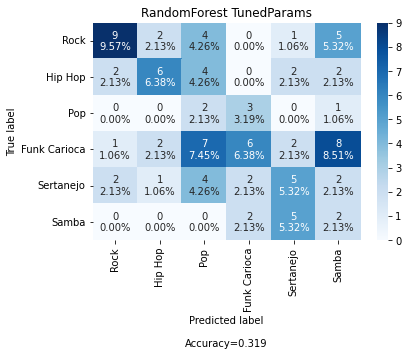

In [ ]:
cm = confusion_matrix(grid_search.predict(X_test_textUS),y_testUS)
make_confusion_matrix(cm,categories = categories)
plt.title('RandomForest TunedParams')
plt.savefig('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF6.png',bbox_inches='tight')
files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF6.png') 

In [ ]:
grid_search.score(X_test_textUS,y_testUS)

0.3191489361702128

In [ ]:
# scorelist = []

# for i in range(1,20):
#     rfclf = RandomForestClassifier(max_depth=i, random_state=0)
#     rfclf.fit(X_train_textUS, y_trainUS)
#     scorelist.append(rfclf.score(X_test_textUS,y_testUS))
    

In [ ]:
# treelist = []

# for i in range(100,150):
#     rfclf = RandomForestClassifier(max_depth=11, random_state=0,n_estimators = i)
#     rfclf.fit(X_train_textUS, y_trainUS)
#     treelist.append(rfclf.score(X_test_textUS,y_testUS))
    

In [ ]:
# treelist.index(max(treelist))


In [ ]:
# plt.plot(scorelist)

In [ ]:
# scorelist.index(max(scorelist))

It was observed that after hyper tuning the parameters and setting it as the maximum attained from the following we are getting a higher accuracy rate from using the RandomForestclassifier.


In [ ]:
rfclfSVD = RandomForestClassifier()


In [ ]:
rfclfSVD.fit(SVD_matrixUS, y_trainUS)

RandomForestClassifier()

In [ ]:
rfclfSVD.score(SVD_matrix_testUS,y_testUS)

0.2872340425531915

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

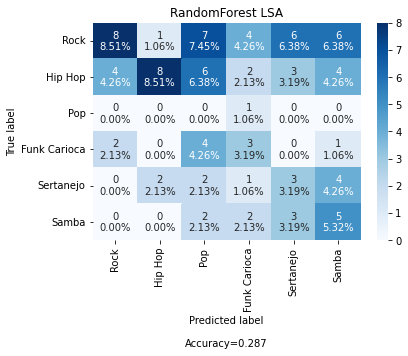

In [ ]:
cm = confusion_matrix(rfclfSVD.predict(SVD_matrix_testUS),y_testUS)
make_confusion_matrix(cm,categories = categories)
plt.title('RandomForest LSA')
plt.savefig('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF7.png',bbox_inches='tight')
files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF7.png') 

In [ ]:
grid_search2.fit(SVD_matrixUS, y_trainUS)

Fitting 5 folds for each of 630 candidates, totalling 3150 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 110, 120, 130, 140, 150, 200]},
             verbose=2)

In [ ]:
grid_search2.score(SVD_matrix_testUS, y_testUS)

0.32978723404255317

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

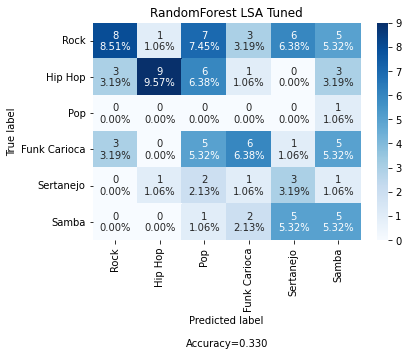

In [ ]:
cm = confusion_matrix(grid_search2.predict(SVD_matrix_testUS),y_testUS)
make_confusion_matrix(cm,categories = categories)
plt.title('RandomForest LSA Tuned')
plt.savefig('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF8.png',bbox_inches='tight')
files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF8.png') 

In [ ]:
result_dict['RF']= precision_recall_fscore_support(y_testUS, rfclf.predict(X_test_textUS),average = 'macro')
result_dict['RF_Tuned']=precision_recall_fscore_support(y_testUS, grid_search.predict(X_test_textUS),average = 'macro')
result_dict['RF_LSA']=precision_recall_fscore_support(y_testUS, rfclfSVD.predict(SVD_matrix_testUS),average = 'macro')
result_dict['RF_LSA_Tuned']=precision_recall_fscore_support(y_testUS, grid_search2.predict(SVD_matrix_testUS),average = 'macro')

## XGBoost

In [ ]:
SVD_matrix_testUS

array([[ 0.54455644, -0.01752286, -0.04785182, ...,  0.0251509 ,
        -0.01119353,  0.05189512],
       [ 0.65389447, -0.01717486, -0.0293529 , ..., -0.00388443,
        -0.02552938, -0.01215339],
       [ 0.58113051,  0.01292455,  0.00651751, ...,  0.03482768,
         0.02970824,  0.02324291],
       ...,
       [ 0.74894141, -0.03399541,  0.05543854, ..., -0.04011413,
         0.00843505, -0.01790576],
       [ 0.65389447, -0.01717486, -0.0293529 , ..., -0.00388443,
        -0.02552938, -0.01215339],
       [ 0.32240185,  0.02149446,  0.06038831, ...,  0.01643109,
        -0.01607528, -0.00441021]])

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgbmodel = XGBClassifier(booster = 'gbtree', enable_categorical=True)
xgbmodelSVD = XGBClassifier(booster = 'gbtree', enable_categorical=True) 

In [ ]:
xgbmodel.fit(X_train_textUS,y_trainUS)

XGBClassifier(enable_categorical=True, objective='multi:softprob')

In [ ]:
xgbmodel.score(X_test_textUS,y_testUS)

0.2553191489361702

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

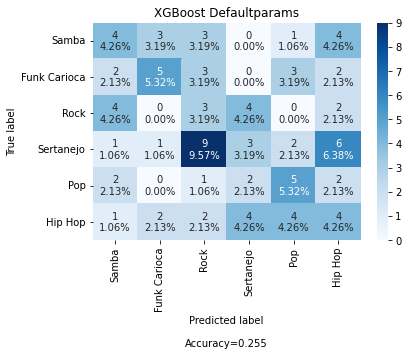

In [ ]:
categories = y_testUS.unique()
cm = confusion_matrix(xgbmodel.predict(X_test_textUS),y_testUS)
make_confusion_matrix(cm,categories = categories)
plt.title('XGBoost Defaultparams')
plt.savefig('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF9.png',bbox_inches='tight')
files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF9.png') 

In [ ]:
xgbmodelSVD.fit(SVD_matrixUS,y_trainUS)

XGBClassifier(enable_categorical=True, objective='multi:softprob')

In [ ]:
xgbmodelSVD.score(SVD_matrix_testUS,y_testUS)

0.23404255319148937

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

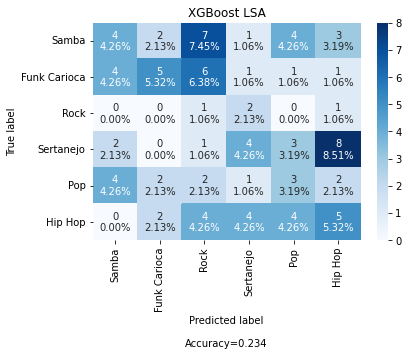

In [ ]:
from google.colab import files
cm = confusion_matrix(xgbmodelSVD.predict(SVD_matrix_testUS ),y_testUS)
make_confusion_matrix(cm,categories = categories)
plt.title('XGBoost LSA')
plt.savefig('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF10.png',bbox_inches='tight')
files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF10.png') 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': np.arange(0, 5, .1),
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth':np.arange(0, 10, 1)
        }

In [ ]:
from sklearn.metrics import roc_auc_score

folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgbmodel, param_distributions=params, n_iter=param_comb,n_jobs=4, cv=skf.split(X_train_textUS,y_trainUS), verbose=3, random_state=1001 )
random_searchSVD = RandomizedSearchCV(xgbmodelSVD, param_distributions=params, n_iter=param_comb,n_jobs=4, cv=skf.split(X_train_textUS,y_trainUS), verbose=3, random_state=1001 )

In [ ]:
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train_textUS, y_trainUS)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 46.61 seconds.


In [ ]:
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

start_time = timer(None) # timing starts from this point for "start_time" variable
random_searchSVD.fit(SVD_matrixUS, y_trainUS)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 8.93 seconds.


In [ ]:
random_searchSVD.score(SVD_matrix_testUS,y_testUS)

0.24468085106382978

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

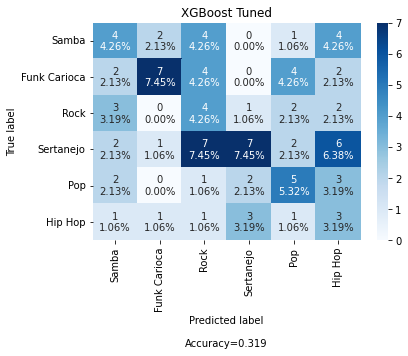

In [ ]:
cm = confusion_matrix(random_search.predict(X_test_textUS),y_testUS)
make_confusion_matrix(cm,categories = categories)
plt.title('XGBoost Tuned')
plt.savefig('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF11.png',bbox_inches='tight')
files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF11.png') 

In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


 All results:
{'mean_fit_time': array([14.99662342,  2.27515121,  9.86688824,  5.75201941,  0.52177677]), 'std_fit_time': array([0.27887956, 0.02963954, 0.02690203, 0.77118869, 0.00964262]), 'mean_score_time': array([0.01483712, 0.01145654, 0.01628499, 0.00905576, 0.01145205]), 'std_score_time': array([0.00267932, 0.00292927, 0.00271942, 0.00364145, 0.00267907]), 'param_subsample': masked_array(data=[0.8, 0.8, 1.0, 0.6, 0.6],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[1, 10, 1, 1, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[8, 1, 5, 2, 0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[3.2, 0.30000000000000004, 0.2, 1.3, 1.8],
             mask=[False, False, False, False, False],
       

In [ ]:
random_searchSVD.score(SVD_matrix_testUS,y_testUS)

0.24468085106382978

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

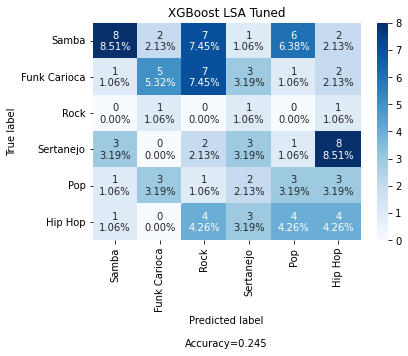

In [ ]:
cm = confusion_matrix(random_searchSVD .predict(SVD_matrix_testUS),y_testUS)
make_confusion_matrix(cm,categories = categories)
plt.title('XGBoost LSA Tuned')
plt.savefig('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF12.png',bbox_inches='tight')
files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF12.png') 

In [ ]:
result_dict['XBG'] = precision_recall_fscore_support(y_testUS, xgbmodel.predict(X_test_textUS),average = 'macro')
result_dict['XBG_Tuned']=precision_recall_fscore_support(y_testUS, random_search.predict(X_test_textUS),average = 'macro')
result_dict['XBG_LSA']=precision_recall_fscore_support(y_testUS, xgbmodelSVD.predict(SVD_matrix_testUS),average = 'macro')
result_dict['XBG_LSA_Tuned']=precision_recall_fscore_support(y_testUS, random_searchSVD.predict(SVD_matrix_testUS),average = 'macro')

#### SVM Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [ ]:
SVMclf = SVC(C = 1.6,kernel='linear',degree = 4)
SVMclfSVD = SVC(C=1.6, kernel='linear', degree=4, gamma='auto')

In [ ]:
%time
SVMclf.fit(X_train_textUS,y_trainUS)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs


SVC(C=1.6, degree=4, kernel='linear')

In [ ]:
%time
SVMclfSVD.fit(SVD_matrixUS,y_trainUS)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


SVC(C=1.6, degree=4, gamma='auto', kernel='linear')

In [ ]:
SVMclf.score(X_test_textUS,y_testUS)

0.39361702127659576

In [ ]:
%time
SVMclfSVD.score(SVD_matrix_testUS,y_testUS)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs


0.2978723404255319

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

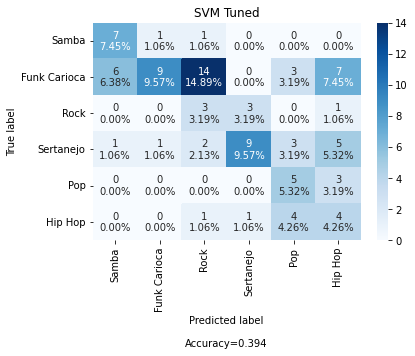

In [ ]:
cm = confusion_matrix(SVMclf.predict(X_test_textUS),y_testUS)
make_confusion_matrix(cm,categories = categories)
plt.title('SVM Tuned')
plt.savefig('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF13.png',bbox_inches='tight')
files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF13.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

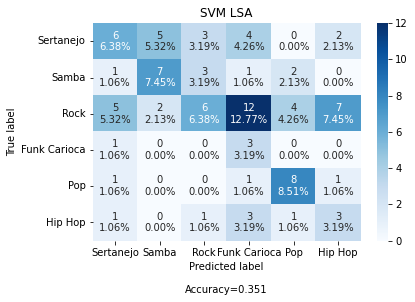

In [ ]:
cm = confusion_matrix(SVMclfSVD.predict(SVD_matrix_testUS),y_testUS)
make_confusion_matrix(cm,categories = categories)
plt.title('SVM LSA')
plt.savefig('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF14.png',bbox_inches='tight')
files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF14.png') 

In [ ]:
result_dict['SVM_Tuned'] =  precision_recall_fscore_support(y_testUS, SVMclf.predict(X_test_textUS),average = 'macro')
result_dict['SVM_LSA']  =precision_recall_fscore_support(y_testUS, SVMclfSVD.predict(SVD_matrix_testUS),average = 'macro')
              

In [ ]:
result_dict['SVM_Tuned'] 

(0.4501082251082251, 0.4141941391941392, 0.39241805608184926, None)

Using an SVM linear classifier a score above.45 is attained which after tuning for any value of C higher than 1.

## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# neigh = KNeighborsClassifier(n_neighbors=3)
# neigh2 = KNeighborsClassifier(n_neighbors=3)
neigh3 = KNeighborsClassifier(n_neighbors=4)
neigh4 = KNeighborsClassifier(n_neighbors=4)

In [ ]:
# neigh.fit(X_train_text,y_train)
# neigh2.fit(SVD_matrix, y_train)

In [ ]:
neigh3.fit(X_train_textUS, y_trainUS)
neigh4.fit(SVD_matrixUS, y_trainUS)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
 # neigh.score(X_test_text,y_test)

In [ ]:
# neigh2.score(SVD_matrix_testUS,y_test)

In [ ]:
neigh3.score(X_test_textUS,y_testUS)

0.1702127659574468

In [ ]:
neigh4.score(SVD_matrix_testUS,y_testUS)

0.20212765957446807

In [ ]:
# cm = confusion_matrix(neigh.predict(X_test_text),y_test)
# make_confusion_matrix(cm,categories = categories)

In [ ]:
# cm = confusion_matrix(neigh.predict(svd_matrix_test),y_test)
# make_confusion_matrix(cm,categories = categories)

In [ ]:
# cm = confusion_matrix(neigh3.predict(X_test_textUS),y_testUS)
# make_confusion_matrix(cm,categories = categories)

In [ ]:
# cm = confusion_matrix(neigh4.predict(SVD_matrix_testUS),y_testUS)
# make_confusion_matrix(cm,categories = categories)

In [ ]:

# table = [['Logit', 'NaiveBayes', 'KNN'], [logit3.score(X_test_textUS,y_testUS),
#                                           nbclfMNB.score(X_test_textUS,y_testUS),
#                                           neigh3.score(X_test_textUS,y_testUS)]]
         

In [ ]:
result_dict['BERT'] = (.381,.313,.307,None)
result_dict

{'BERT': (0.381, 0.313, 0.307, None),
 'LR': (0.3611845215876571, 0.35106382978723405, 0.3253952896948253, None),
 'LR_LSA': (0.4595300402559477, 0.3829787234042553, 0.3914819787987861, None),
 'NB_Gaussian': (0.3550453514739229,
  0.3029151404151405,
  0.2770045664998189,
  None),
 'NB_Mulinomial': (0.2722222222222222,
  0.27997557997558,
  0.2550596451959724,
  None),
 'RF': (0.386026936026936, 0.3536782661782662, 0.3409244558650331, None),
 'RF_LSA': (0.3423842000568343, 0.3261752136752137, 0.2769782189137028, None),
 'RF_LSA_Tuned': (0.423991848991849,
  0.3773351648351649,
  0.3407252987915598,
  None),
 'RF_Tuned': (0.3195165945165945,
  0.33128815628815633,
  0.3146939427111841,
  None),
 'SVM_LSA': (0.46287878787878795,
  0.3751068376068376,
  0.3650254507397364,
  None),
 'SVM_Tuned': (0.4501082251082251,
  0.4141941391941392,
  0.39241805608184926,
  None),
 'XBG': (0.5210317460317461, 0.5012667887667888, 0.49838935574229687, None),
 'XBG_LSA': (0.37051656920077974,
  0.30057

In [ ]:
result_dict

{'BERT': (0.381, 0.313, 0.307, None),
 'LR': (0.3611845215876571, 0.35106382978723405, 0.3253952896948253, None),
 'LR_LSA': (0.4595300402559477, 0.3829787234042553, 0.3914819787987861, None),
 'NB_Gaussian': (0.3550453514739229,
  0.3029151404151405,
  0.2770045664998189,
  None),
 'NB_Mulinomial': (0.2722222222222222,
  0.27997557997558,
  0.2550596451959724,
  None),
 'RF': (0.386026936026936, 0.3536782661782662, 0.3409244558650331, None),
 'RF_LSA': (0.3423842000568343, 0.3261752136752137, 0.2769782189137028, None),
 'RF_LSA_Tuned': (0.423991848991849,
  0.3773351648351649,
  0.3407252987915598,
  None),
 'RF_Tuned': (0.3195165945165945,
  0.33128815628815633,
  0.3146939427111841,
  None),
 'SVM_LSA': (0.46287878787878795,
  0.3751068376068376,
  0.3650254507397364,
  None),
 'SVM_Tuned': (0.4501082251082251,
  0.4141941391941392,
  0.39241805608184926,
  None),
 'XBG': (0.5210317460317461, 0.5012667887667888, 0.49838935574229687, None),
 'XBG_LSA': (0.37051656920077974,
  0.30057

In [ ]:
rdf = pd.DataFrame(result_dict)
resultdf = np.transpose(rdf.drop(3))
resultdf.columns =['Precision', 'Recall','F1-Score']

In [ ]:
resultdf['Accuracy'] = [.447,.436,.372,.394,.447,.404,.383,.479,.457,.404,.447,.426,.426,.404,.333]

In [ ]:
!pip install dataframe_image

     |████████████████████████████████| 1.1 MB 8.5 MB/s 
     |████████████████████████████████| 271 kB 59.6 MB/s 
     |████████████████████████████████| 94 kB 2.5 MB/s 
     |████████████████████████████████| 144 kB 42.9 MB/s 


In [ ]:
from pandas.plotting import table
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False) 
# print(tabulate(resultdf,tablefmt='fancy_grid',headers = ['Model','Precision', 'Recall','F1-Score','Accuracy'],showindex =True))
table(ax,resultdf)
plt.savefig('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/Table.png')
# with open('table.txt', 'w') as f:
    # f.write(tabulate(tabulate(resultdf,tablefmt='fancy_grid',headers = ['Model','Precision', 'Recall','F1-Score','Accuracy'],showindex =True)))

In [ ]:
# print(tabulate(table,tablefmt='fancy_grid', headers='firstrow',showindex =True))

### Use eli5 to view

In [ ]:
# !pip install eli5

In [ ]:
####Eli5 viewer
import eli5
eli5.show_weights(estimator=logit3, 
                  feature_names= list(vectorizer.get_feature_names()),
                 top=(10, 5))

In [ ]:
# from eli5 import show_weights
# from eli5.sklearn import PermutationImportance

In [ ]:
# X_test_textUS

In [ ]:
# ####Eli5 viewer
# import eli5
# eli5.show_weights(estimator=xgbmodel, 
#                   feature_names= list(vectorizer.get_feature_names()),
#                  top=(50, 5))

In [ ]:
####Eli5 viewer
# import eli5
# eli5.show_weights(estimator=rfclf, 
#                   feature_names= list(vectorizer.get_feature_names()),
#                  top=(50, 5))

## Song Genre Classification using BERT

Since the words used in songs are of different genres are very similar but the meaning of these words might differ in each of these genres.
To tackle this problem we can iuntroduce sequential learning models of whcih Bidirectional Encoder Representations from Transformers (BERT) which is a transformer-based machine learning technique for NLP.

song genre is very correlatted to the certain sentences and is dependant on the sentence

BERT has BERT base and BERT large .

Base has 12 encoders and BERT large has 24.

__Masked Language Model:__


A saved Bert model which has 12 layers and 768 hidden states is used.
A HubKeras layer will be used to use the over the bert preprocessor and encoder.
The preprocessed returns the output in the form of a dictionary so we need to use pooled_output in order to get encoding for the entire sentence.
The only limitation here is each of the lyrics is more than the capacity of BERT as it handles only 512 sentences and the lyrics of each song is much higher than that.
Due to this we might get a reduced accuracy of the model.



## Transformers over LSTM 

LSTM is not used as they are very slow adn they are not truly bidirectional.
However transformers adresses these concerns as the conext is learnet simultaneouly from both the directions.<br>
It generateds embeddings simultaneously.<br>
If we stack decoders we get GPT and conversely if we stack the encoders we get BERT.

### BERT saved model



In [ ]:
encoder_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
preprocess_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
##Setting y to the encoded y labels 
X_under = Undersampleddf['Lyric'].apply(format_str)
y_under = Undersampleddf['label']

In [ ]:
### Test Train split unbalanced
X_trainUS, X_testUS, Con_y_trainUS, Con_y_testUS = train_test_split(X_under, y_under, test_size=0.20, random_state=100)

In [ ]:
%time 
# downloading preprocessing files and model
bert_preprocessor = hub.KerasLayer(preprocess_url)
bert_encoder = hub.KerasLayer(encoder_url)

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocessor(text_input)
outputs = bert_encoder(preprocessed_text)
##We take 6 as the number of nodes as it the number of categories are 6
##Dropout is taken as 10 percent
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
# l = tf.keras.layers.Dense(10, input_dim=6, activation='softmax')
l = tf.keras.layers.Dense(6, activation='softmax', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
model.summary()

In [ ]:
model.fit(X_trainUS, Con_y_trainUS, epochs=1)

In [ ]:
model.evaluate(X_testUS,Con_y_testUS)

In [ ]:
cm = confusion_matrix(model.predict(X_testUS),Con_y_testUS)
make_confusion_matrix(cm,categories = categories)

In [ ]:
y_predicted = model.predict(X_testUS)
y_predicted = y_predicted.flatten()

In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
cm
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## BERT Working model Change parameters

In [2]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocessor(text_input)
outputs = bert_encoder(preprocessed_text)
##We take 6 as the number of nodes as it the number of categories are 6
##Dropout is taken as 10 percent
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
# l = tf.keras.layers.Dense(10, input_dim=6, activation='softmax')
l = tf.keras.layers.Dense(6, activation='softmax', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

NameError: ignored

In [ ]:
from keras import backend as K

def balanced_recall(y_true, y_pred):
    """This function calculates the balanced recall metric
    recall = TP / (TP + FN)
    """
    recall_by_class = 0
    # iterate over each predicted class to get class-specific metric
    for i in range(y_pred.shape[1]):
        y_pred_class = y_pred[:, i]
        y_true_class = y_true[:, i]
        true_positives = K.sum(K.round(K.clip(y_true_class * y_pred_class, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true_class, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        recall_by_class = recall_by_class + recall
    return recall_by_class / y_pred.shape[1]

def balanced_precision(y_true, y_pred):
    """This function calculates the balanced precision metric
    precision = TP / (TP + FP)
    """
    precision_by_class = 0
    # iterate over each predicted class to get class-specific metric
    for i in range(y_pred.shape[1]):
        y_pred_class = y_pred[:, i]
        y_true_class = y_true[:, i]
        true_positives = K.sum(K.round(K.clip(y_true_class * y_pred_class, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred_class, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        precision_by_class = precision_by_class + precision
    # return average balanced metric for each class
    return precision_by_class / y_pred.shape[1]

def balanced_f1_score(y_true, y_pred):
    """This function calculates the F1 score metric"""
    precision = balanced_precision(y_true, y_pred)
    recall = balanced_recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [ ]:
METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name="accuracy"),
      balanced_recall,
      balanced_precision,
      balanced_f1_score
]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=METRICS)

In [ ]:
model.summary()

In [ ]:
def string_to_int_labels(labels):
    int_labels = []
    for label in labels:
        if label =="Rock":
            int_labels.append(0)
        elif label == "Hip Hop":
            int_labels.append(1)
        elif label == "Pop":
            int_labels.append(2)
        elif label == "Funk Carioca":
            int_labels.append(3)
        elif label == "Samba":
            int_labels.append(4)
        elif label=="Sertanejo":
            int_labels.append(5)
    return int_labels

In [ ]:
y = tf.keras.utils.to_categorical(string_to_int_labels(y_testUS), num_classes=6)

In [ ]:
Con_y_trainUS = pd.DataFrame(string_to_int_labels(y_trainUS)).astype('category')
Con_y_testUS = pd.DataFrame(string_to_int_labels(y_testUS)).astype('category')

In [ ]:
def labels_to_onehot(labels):
    labels_catg = string_to_int_labels(labels)
    a = np.array(labels_catg)
    b = np.zeros((a.size, a.max()+1))
    b[np.arange(a.size),a] = 1
    return b

In [ ]:
y_train = labels_to_onehot(y_trainUS)
y_test = labels_to_onehot(y_testUS)

In [ ]:
model.fit(X_trainUS, y_train, epochs=20)

In [ ]:
model.evaluate(X_testUS,y_test)

In [ ]:
model.save('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/Saved_models/Bert1')

In [ ]:
# test_pred_y
pred_test_array = np.argmax(test_pred_y, axis=1)
gt_array = np.argmax(y_test, axis=1)
cm = confusion_matrix(gt_array,pred_test_array)

In [ ]:
len(gt_array[gt_array == pred_test_array])/len(gt_array)

In [ ]:
test_pred_y = model.predict(X_testUS)

In [ ]:
np.argmax(test_pred_y, axis=1)


In [ ]:
np.argmax(y_test, axis=1)

In [ ]:
test_pred_y = model.predict(X_testUS)
pred_test_array = np.argmax(test_pred_y, axis=1)
gt_array = np.argmax(y_test, axis=1)
cm = confusion_matrix(gt_array,pred_test_array)
#make_confusion_matrix(cm,categories = categories)
cm

In [ ]:
from google.colab import files
categories = y_testUS.unique()
make_confusion_matrix(cm,categories = categories)
plt.title('BERT')
plt.savefig('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/BERT.png',bbox_inches='tight')
files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/BERT.png') 

### BERT ONE-HOT encoding of labels

In [ ]:
def labels_to_onehot(labels):
    # labels_catg = string_to_int_labels(labels)
    a = np.array(labels)
    b = np.zeros((a.size, a.max()+1))
    b[np.arange(a.size),a] = 1
    return b

In [ ]:
y_train_ENC = labels_to_onehot(Con_y_trainUS)
y_test_ENC = labels_to_onehot(Con_y_testUS)

In [ ]:
y_train_ENC

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
model.fit(X_trainUS, y_train_ENC, epochs=3)

In [ ]:
model.evaluate(X_testUS,y_testUS)

In [ ]:
cm = confusion_matrix(model.predict(X_testUS),y_testUS)
make_confusion_matrix(cm,categories = categories)

## BERT Multi-nomial text classification Using Pytorch 

In [ ]:

import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

In [ ]:

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

In [ ]:
encoded_data_train = tokenizer.batch_encode_plus(
    X_trainUS.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)
encoded_data_val = tokenizer.batch_encode_plus(
    X_testUS.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(Con_y_trainUS.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(Con_y_testUS.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [ ]:

from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
epochs = 5

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals
    
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'/content/drive/MyDrive/BERT_epochs{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

# model.to(device)

model.load_state_dict(torch.load('/content/drive/MyDrive/BERT_epochs1.model', map_location=torch.device('cpu')))

_, predictions, true_vals = evaluate(dataloader_validation)
accuracy_per_class(predictions, true_vals)

### Bibliography

{cite:p}`weinberg1995retinoblastoma`

@article{weinberg1995retinoblastoma,
  title={The retinoblastoma protein and cell cycle control},
  author={Weinberg, Robert A},
  journal={cell},
  volume={81},
  number={3},
  pages={323--330},
  year={1995},
  publisher={Elsevier}
}